# Import

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#%cd D:\desk top folders\ML\MachineLearning2024W\Projects\mini project 2\Dataset


In [3]:
!pip install gdown
!gdown 10SIXYJRk4fKNkJQYhtM6cZTxqlfJLrEn

Downloading...
From: https://drive.google.com/uc?id=10SIXYJRk4fKNkJQYhtM6cZTxqlfJLrEn
To: /content/heart.csv
100% 37.1k/37.1k [00:00<00:00, 57.9MB/s]


# Load Data and Initialize Model

In [5]:
# Load the data
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
X = data.drop('target', axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize and train the Gaussian Naive Bayes classifier
model = GaussianNB()

# Train

In [7]:
model.fit(X_train, y_train)

GaussianNB()

# Eval and Inference

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 2.
    # Correcting the loop below
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.86      0.77      0.81       102
     Class 1       0.80      0.87      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



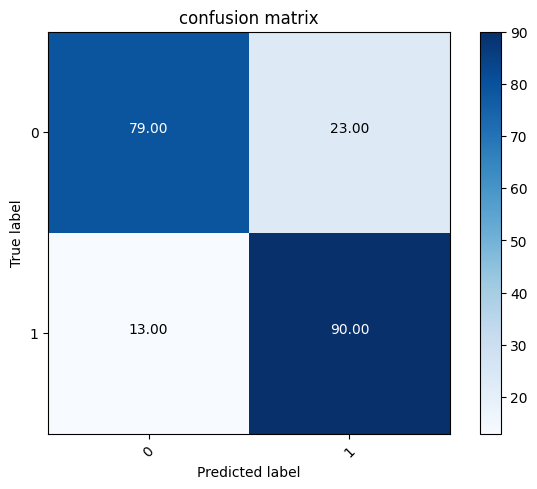

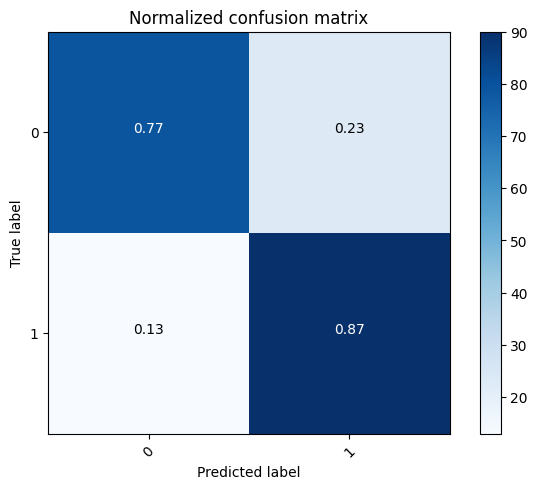

In [9]:
# Predict the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=False)

plot_confusion_matrix(conf_mat ,classes=[0, 1], title='confusion matrix')
plot_confusion_matrix(conf_mat ,classes=[0, 1], normalize=True, title='Normalized confusion matrix')

print("Classification Report:\n", class_report)


In [11]:
test_data = data.sample(n=5, random_state=53)
pred = model.predict(test_data.drop("target", axis='columns'))
test_data['predictions'] = pred
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,predictions
420,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1,1
706,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0,1
673,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1,1
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,0
187,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0,0
